# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

In [2]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
# import ...  # your favorite data package
# import ...  # your favorite visualization package

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
train_df = pd.read_csv('train.csv')
train_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [5]:
train_df.drop(columns=['dropoff_datetime'], inplace=True)
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])
train_df.head(3)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

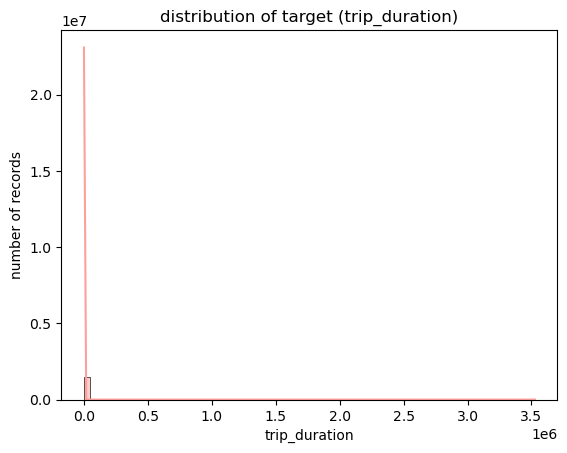

In [6]:
palette = sns.color_palette("pastel")

sns.histplot(train_df['trip_duration'], bins= 70, kde=True, color=palette[3]) 
plt.xlabel('trip_duration')
plt.ylabel('number of records')
plt.title('distribution of target (trip_duration)')
plt.show()


**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Видимо, в данных есть выбросы или тяжелый хвост, поэтому по обычному распределению сложно вообще что-то сказать. Можно построить в лог шкале - сделано ниже

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

RMSLE менее чувствительна к выбросам в данных, чем RMSE, так как логарифмирование таргета сглаживает влияние больших значений, делая модель более устойчивой к ошибкам. Это может быть более информативно, чем абсолютная ошибка (MSE), особенно в случае с широким диапазоном значений таргета

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: Оптимизация RMSLE для модели $a$:

$$RMSLE(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

Оптимизация MSE для модели $\hat{a}$:

$$MSE(X, \hat{y}, \hat{a}) = \frac{1}{\ell}\sum_{i=1}^{\ell}\big(\hat{y}_i - \hat{a}(x_i)\big)^2 = \frac{1}{\ell}\sum_{i=1}^{\ell}\big( \log{y_i + 1} - \hat{a}(x_i)\big)^2$$

Подставим $a(x_i) = \exp(\hat{a}(x_i)) - 1$в выражение для RMSLE:

$$RMSLE(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(log(y_i + 1) - \log{(\exp(\hat{a}(x_i)) - 1} + 1)\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{y_i + 1} - \hat{a}(x_i)\big)^2}$$


Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

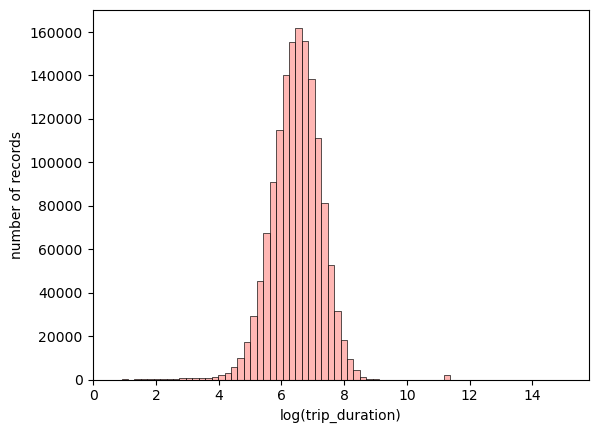

In [7]:
train_df['log_trip_duration'] = np.log1p(train_df['trip_duration'].values)
df_trip_duration = train_df.trip_duration
train_df.drop(columns=['trip_duration'], inplace=True)
sns.histplot(train_df['log_trip_duration'], bins=70, color=palette[3])
plt.xlabel('log(trip_duration)')
plt.ylabel('number of records')
plt.show()

Здесь уже видно, что распредление в логарифмической шкале похоже на нормальное, слева более длинный хвост и есть выбросы справа(слишком длинные поездки)

In [8]:
print("Средняя продолжительность поездок, в минутах:", np.exp(5) // 60, np.exp(8) // 60)

Средняя продолжительность поездок, в минутах: 2.0 49.0


Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [9]:
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(np.mean((log1p_y_true - log1p_y_pred)**2))

rmsle_best_const = rmsle(train_df['log_trip_duration'], np.mean(train_df['log_trip_duration']))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

In [10]:
plt.style.use('dark_background')

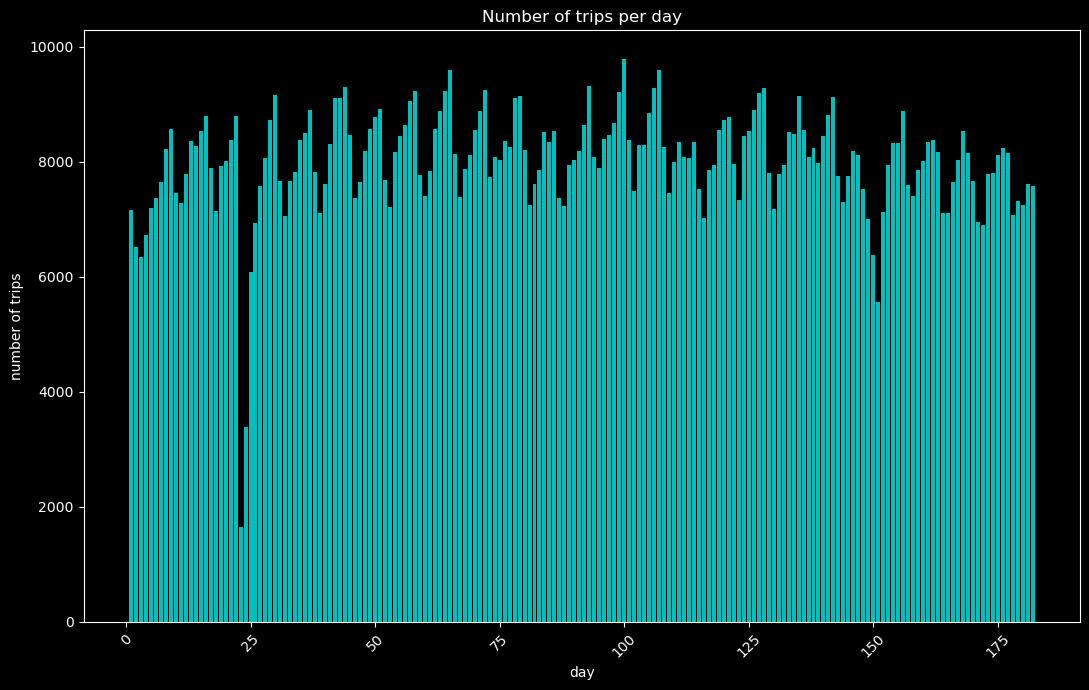

In [11]:
daily_df = train_df.groupby(train_df['pickup_datetime'].dt.day_of_year)['id'].count()
plt.figure(figsize=(11, 7))
plt.bar(daily_df.index, daily_df.values, color='c')
plt.xlabel('day')
plt.ylabel('number of trips')
plt.title('Number of trips per day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

In [12]:
daily_df = daily_df.sort_values(ascending=True).head(5)
daily_df.to_frame()

,id
pickup_datetime,
23,1648
24,3383
151,5570
25,6084
3,6353


In [13]:
print(f'Скачок вниз в январе 2016: {daily_df[0:2]}')
print(f'Скачок вниз в мае-июне 2016: {daily_df[2:3]}')

Скачок вниз в январе 2016: pickup_datetime
23    1648
24    3383
Name: id, dtype: int64
Скачок вниз в мае-июне 2016: pickup_datetime
151    5570
Name: id, dtype: int64


В январе: *The January 2016 United States blizzard produced up to 3 ft (91 cm) of snow in parts of the Mid-Atlantic and Northeastern United States during January 22–24, 2016. A travel ban was instituted for New York City and Newark, New Jersey, for January 23–24* (23-24 были запрещены поездки из-за сильного снегопада)

В конце мая: национальный день памяти в США(?)

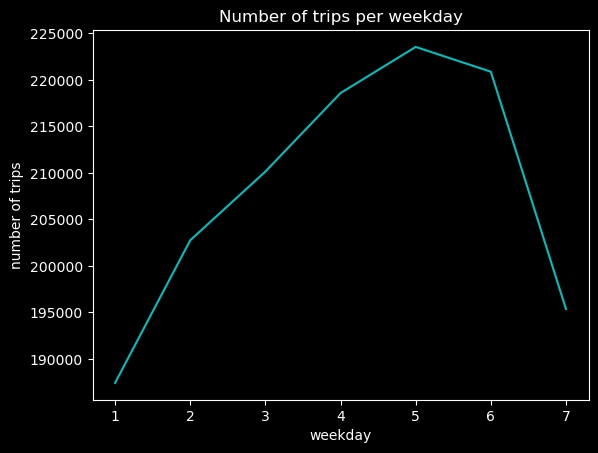

In [14]:
weekday_df = train_df.groupby(train_df['pickup_datetime'].apply(lambda x: x.isoweekday())).size()

sns.lineplot(x = weekday_df.index, y = weekday_df.values, color='c')
plt.xlabel('weekday')
plt.ylabel('number of trips')
plt.title('Number of trips per weekday')
plt.show()

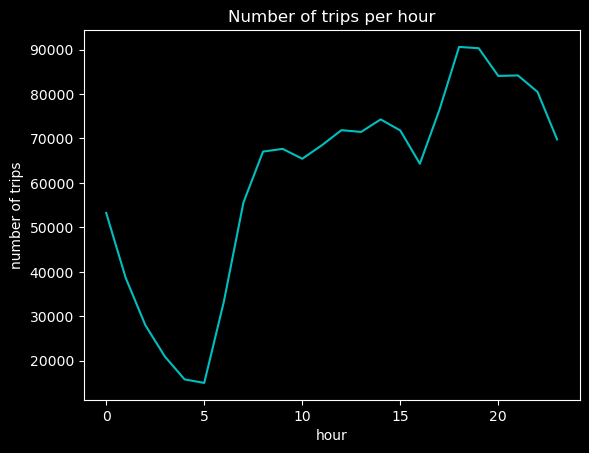

In [15]:
hours_df = train_df.groupby(train_df['pickup_datetime'].apply(lambda x: x.hour)).size()

sns.lineplot(x = hours_df.index, y = hours_df.values, color='c')
plt.xlabel('hour')
plt.ylabel('number of trips')
plt.title('Number of trips per hour')
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

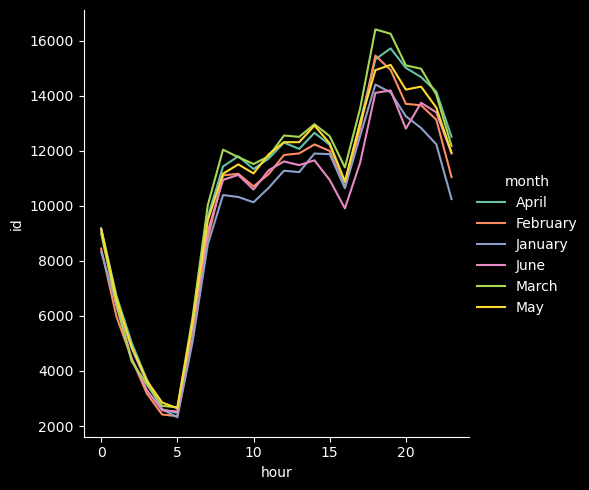

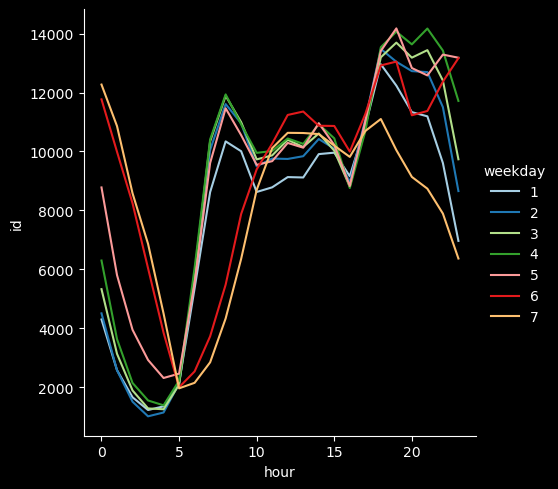

In [16]:
by_month_df = train_df
by_month_df['month'] = by_month_df['pickup_datetime'].dt.month_name()
by_month_df['hour']= by_month_df['pickup_datetime'].dt.hour
by_month_df['weekday']= by_month_df['pickup_datetime'].dt.weekday
by_month_df['weekday'] = by_month_df['weekday'] + 1
df1 = by_month_df.groupby(['month', 'hour'])[['id']].count()
sns.relplot(x = 'hour', y = 'id', hue = 'month', data = df1, palette='Set2', kind='line')
df2 = by_month_df.groupby(['weekday', 'hour'])[['id']].count()
sns.relplot(x = 'hour', y = 'id', hue = 'weekday', data = df2, palette='Paired', kind='line')

*Общий тренд такой, что количество поездок падает до минимума в районе 5 утра, достигает максимума в 18-20 (вполне устойчиво растет с момента 5 утра - люди едут по делам, кроме промежутка в примерно 9 - 17, что связано с рабочими часами), затем падает до 24*

*Разница в графиках по месяцам на самом деле небольшая, особенно до около 8 часов утра. Примерно начиная с этого момента и до конца дня сохраняется тенденция того, что чем теплее становится, тем больше люди ездят на такси (при этом, выпадают март и июнь - возможно, это связано с тем, что в июне начинаются летние отпуска, то есть спрос на поездки ниже, в марте их в целом наибольшее количество - возможно, такси дешевеет после сложного погодного периода, спрос растет)*

*В распределении по дням можно выделить по трендам поездки в рабочие будни - с понедельника до пятницы, и в выходные: субботу и воскресенье. Пятница при этом по распредлению находится где-то между. В выходные заметно больше поездок с 0 до 4 (что логично, люди отдыхают и гуляют), а в вечернее время (18 - 24) зависит от дня: перед рабочей неделей, в воскресенье, поездок даже меньше, чем в рабочие дни (похоже на спокойные вечер перед рабочей неделей), а в субботу наоборот больше (график возрастает начиная с 20, в отличие от других дней)*

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

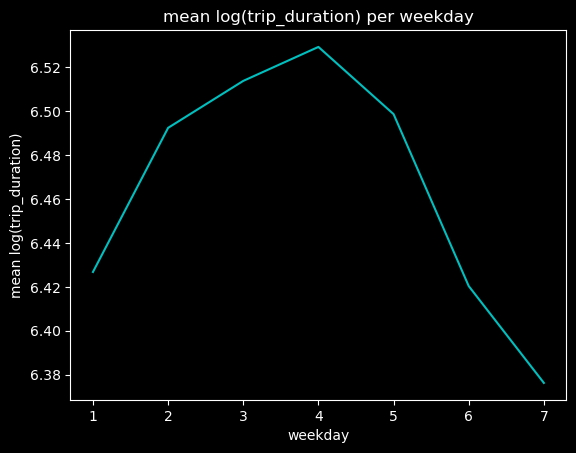

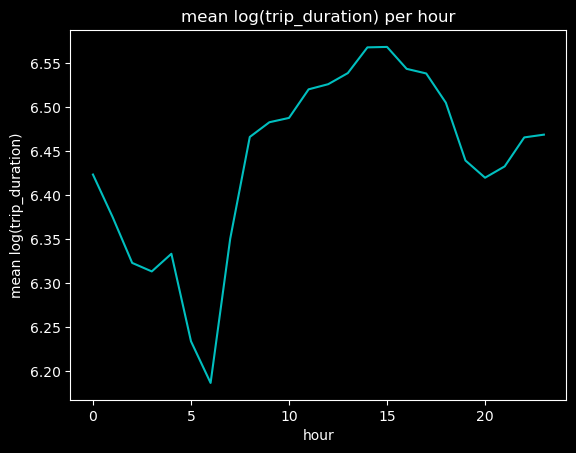

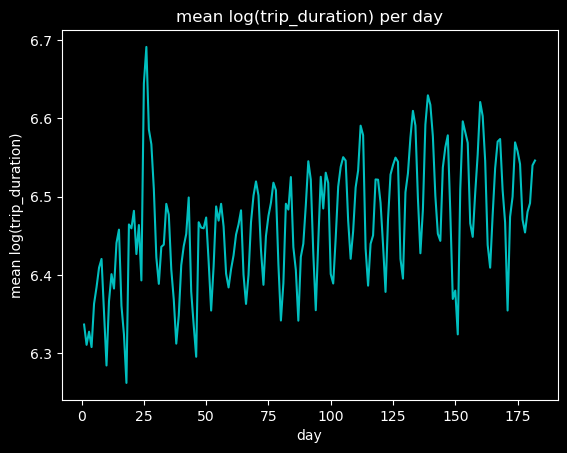

In [17]:
X = train_df
train, df_test = train_test_split(X, test_size=0.3, random_state=42) #ниже разделила на x y, так просто удобнее строить графики

weekday = train.groupby('weekday')['log_trip_duration'].mean()
sns.lineplot(x = weekday.index, y = weekday.values, color='c')
plt.xlabel('weekday')
plt.ylabel('mean log(trip_duration)')
plt.title('mean log(trip_duration) per weekday')
plt.show()

hours = train.groupby('hour')['log_trip_duration'].mean()
sns.lineplot(x = hours.index, y = hours.values, color='c')
plt.xlabel('hour')
plt.ylabel('mean log(trip_duration)')
plt.title('mean log(trip_duration) per hour')
plt.show()

train['day'] = train['pickup_datetime'].dt.day_of_year
days = train.groupby('day')['log_trip_duration'].mean()
sns.lineplot(x = days.index, y = days.values, color='c')
plt.xlabel('day')
plt.ylabel('mean log(trip_duration)')
plt.title('mean log(trip_duration) per day')
plt.show()


1. Зависимость от дня недели: график в целом похож на график с количеством поездок, но здесь получается, что максимальная средняя продолжительность поездки - четверг, а наибольшее количество поездок приходится на пятницу. Почему в четверг большие пробки (а не в пятницу), честно говоря, не ясно. При этом самые короткие поездки в воскресенье, что логично - поездок всего не так много, а значит и пробок тоже. Еще интересный момент в том, что наименьшее количество поездок приходится на понедельник, но средний логарифм их продолжительности не наименьший, что можно связать с общей загруженностью дорог (уже исследовали зависимость от рабочих часов и локальные пики во время поездок на работу)

2. Зависимость от часа в сутках: спрос на поездки и их средняя продолжительность похожи в распределении по часам суток, но есть два интересных момента, в которых продолжительность поездки растет и падает не одновременно с количеством поездок. Где-то в 3 - 4 часа ночи поездки становятся длиннее - вероятно, начинаются пробки из-за возвращения людей домой после какого то веселья. Еще около 20 часов средняя продолжительность падает - вероятно, заканчиваются пробки вызванные тем, что люди возвращались с работы

3. В аномальные периоды динамика разная: во время снегопада продолжительность резко растет, а во время (неясно чего) в конце мая наоборот резко падает. Первое можно объяснить затрудненным движением на дорогах и пробками, второе неясно. Еще есть в целом положительный тренд - продолжительность поездки растет с зимы до лета. Возможно, часть людей не ездит зимой на машине, а к весне - лету начинает, то есть загруженность дорог становится больше

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [18]:
train_df['day'] = train_df['pickup_datetime'].dt.day_of_year
#days.to_frame().sort_values('log_trip_duration', ascending=True).head(20)

In [19]:
train_df['snow'] =  train_df.day.apply(lambda x: 1 if x == 26 else 0)
train_df['may'] = train_df.day.apply(lambda x: 1 if x == 151 else 0)

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

*День недели, час, месяц как будто логичнее рассматривать как категориальные - линейной зависимости по ним таргета нет, а влияют они при этом достаточно. День в году можно рассматривать как численный признак - есть некоторый линейный тренд. Аномалии также категориальны, бинарные признаки*

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [20]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'log_trip_duration', 'month',
       'hour', 'weekday', 'day'],
      dtype='object')

In [21]:
train, test = train_test_split(train_df, test_size=0.3, random_state=42) 
features = ['month', 'hour', 'weekday', 'snow', 'may', 'day']
categ = ['month', 'hour', 'weekday', 'snow', 'may']

X_train = train[features]
X_test = test[features]
y_train = train.log_trip_duration
y_test = test.log_trip_duration


In [22]:
transformer = ColumnTransformer(
  [
    ('cat', OneHotEncoder(), ['weekday', 'month', 'snow', 'may', 'hour']),
    ('num', StandardScaler(), ['day'])
  ]
)
pipeline = Pipeline(steps=[
  ('ohe_and_scale', transformer),
  ('ridge', Ridge())
])

y_train_ = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)
print(f'test:{rmsle(y_test, y_pred)}')
print(f'train:{rmsle(y_train, y_pred_train)}')

test:0.7880191686369116
train:0.7889132809316411


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [23]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [24]:
random_state= 42
x = train_df.sample(1000)
your_lat_values = x.pickup_latitude
your_lon_values = x.pickup_longitude

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

*Очевидным образом выделяется Манхэттен, а кроме него еще аэропорт Дж.Ф.Кэннеди и аэропорт Ла-Гвардия. Особенность наверное в том, что точек много и они очень близки по координатам. Вероятно, средняя продолжительность пути для них очень близкая*

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [25]:
def haversine_array(lat1, lng1, lat2, lng2): #код с семинара
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

train_df.loc[:, 'haversine'] = haversine_array(train_df['pickup_latitude'].values, train_df['pickup_longitude'].values, 
                                        train_df['dropoff_latitude'].values, train_df['dropoff_longitude'].values)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [26]:
train_df['log_haversine'] = np.log1p(train_df['haversine'])

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [27]:
print(f'Corr between haversine and target: {train_df.log_trip_duration.corr(train_df.haversine)}')
print(f'Corr between log_haversine and target: {train_df.log_trip_duration.corr(train_df.log_haversine)}')

Corr between haversine and target: 0.5735948311180146
Corr between log_haversine and target: 0.7498822373942491


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

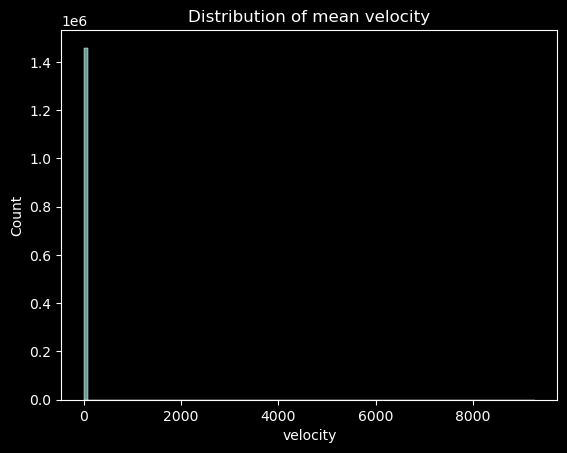

In [28]:
train_df['velocity']= train_df.loc[:, 'haversine']/(df_trip_duration/3600 )
sns.histplot(train_df['velocity'], bins=100)
plt.title('Distribution of mean velocity')
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

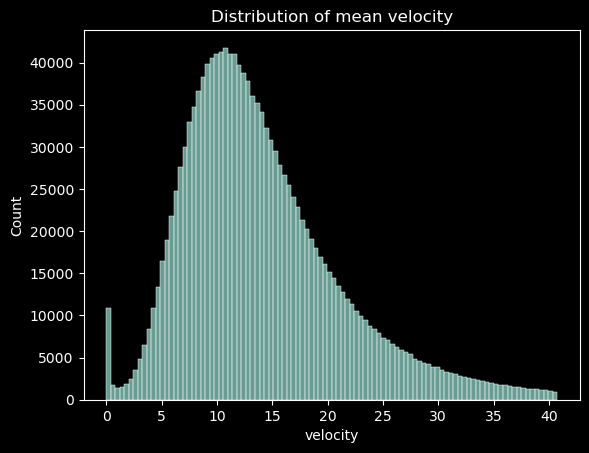

In [29]:
speed = train_df['velocity'].quantile(0.99)
train_df_filt = train_df[train_df['velocity'] <= speed]
sns.histplot(train_df_filt['velocity'], bins=100)
plt.title('Distribution of mean velocity')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

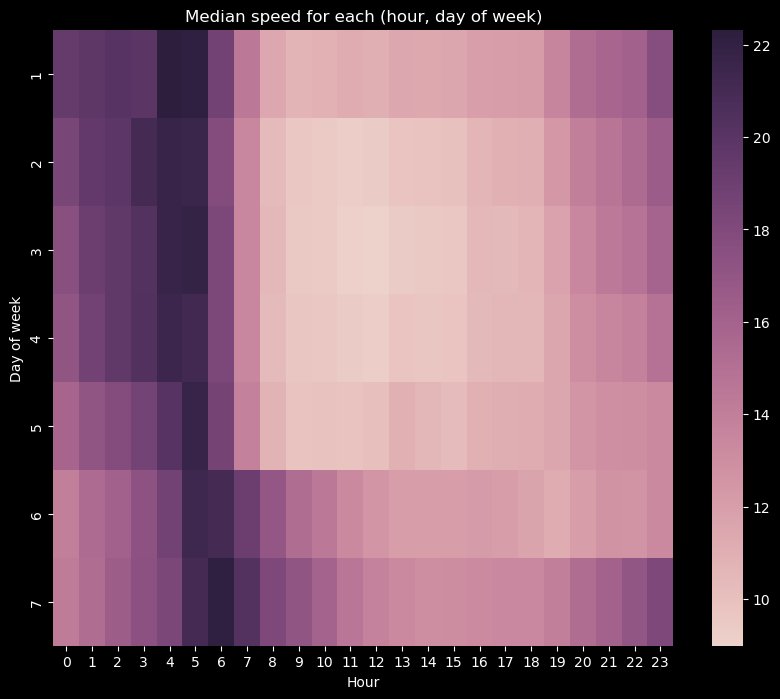

In [30]:
medians = train_df_filt.groupby(['weekday', 'hour'])['velocity'].median().unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(medians, cmap=sns.cubehelix_palette(as_cmap=True))
plt.xlabel('Hour')
plt.ylabel('Day of week')
plt.title('Median speed for each (hour, day of week)')
plt.show()


Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

*Потому что она зависит от продолжительности и таргета, а мультиколлинеарные признаки ухудшают модель*

In [31]:
train_df.drop(columns=['velocity'], inplace=True)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

*Скорость минимальна в рабочие дни с 8 до 18, так как много пробок (и немного ниже среднего поздно вечером в пятницу и субботу), а максимальна в 5 - 6 утра в будни, и еще в 7 в выходные*

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [32]:
train_df['traffic'] = np.where(((train_df.weekday < 6) & (train_df.hour > 7) & (train_df.hour < 19)), True, False)
train_df['free'] = np.where(((train_df.weekday < 6) & (train_df.hour > 3) & (train_df.hour < 6))| ((train_df.weekday > 5) & (train_df.hour > 4)
                    & (train_df.hour < 8) | ((train_df.weekday == 7) & (train_df.hour > 21))), True, False)

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [33]:
#манхэттен добавляем дальше
fkennedy = (40.6417, -73.7789)
laguardia = (40.7769, -73.8741)
#смотрим, что точка находится в расстоянии не более полутора километров
train_df['fk_dropoff'] = np.where(haversine_array(train_df.loc[:, 'dropoff_latitude'], train_df.loc[:, 'dropoff_longitude'], 
fkennedy[0], fkennedy[1]) <=1, True, False)

train_df['fk_pickup'] = np.where(haversine_array(train_df.loc[:, 'pickup_latitude'], train_df.loc[:, 'pickup_longitude'], 
fkennedy[0], fkennedy[1]) <=1, True, False)

train_df['lag_dropoff'] = np.where(haversine_array(train_df.loc[:, 'dropoff_latitude'], train_df.loc[:, 'dropoff_longitude'], 
laguardia[0], laguardia[1]) <=1, True, False)

train_df['lag_pickup'] = np.where(haversine_array(train_df.loc[:, 'pickup_latitude'], train_df.loc[:, 'pickup_longitude'], 
laguardia[0], laguardia[1]) <=1, True, False)


In [34]:
print(train_df.fk_dropoff.value_counts())
print(train_df.fk_pickup.value_counts())
print(train_df.lag_dropoff.value_counts())
print(train_df.lag_pickup.value_counts())

fk_dropoff
False    1449429
True        9215
Name: count, dtype: int64
fk_pickup
False    1433452
True       25192
Name: count, dtype: int64
lag_dropoff
False    1447954
True       10690
Name: count, dtype: int64
lag_pickup
False    1438443
True       20201
Name: count, dtype: int64


*Эти признаки могут быть полезны, так как являются точками скопления поездок в целом, плюс дороги из/в аэропорты должны иметь схожую продолжительность*

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

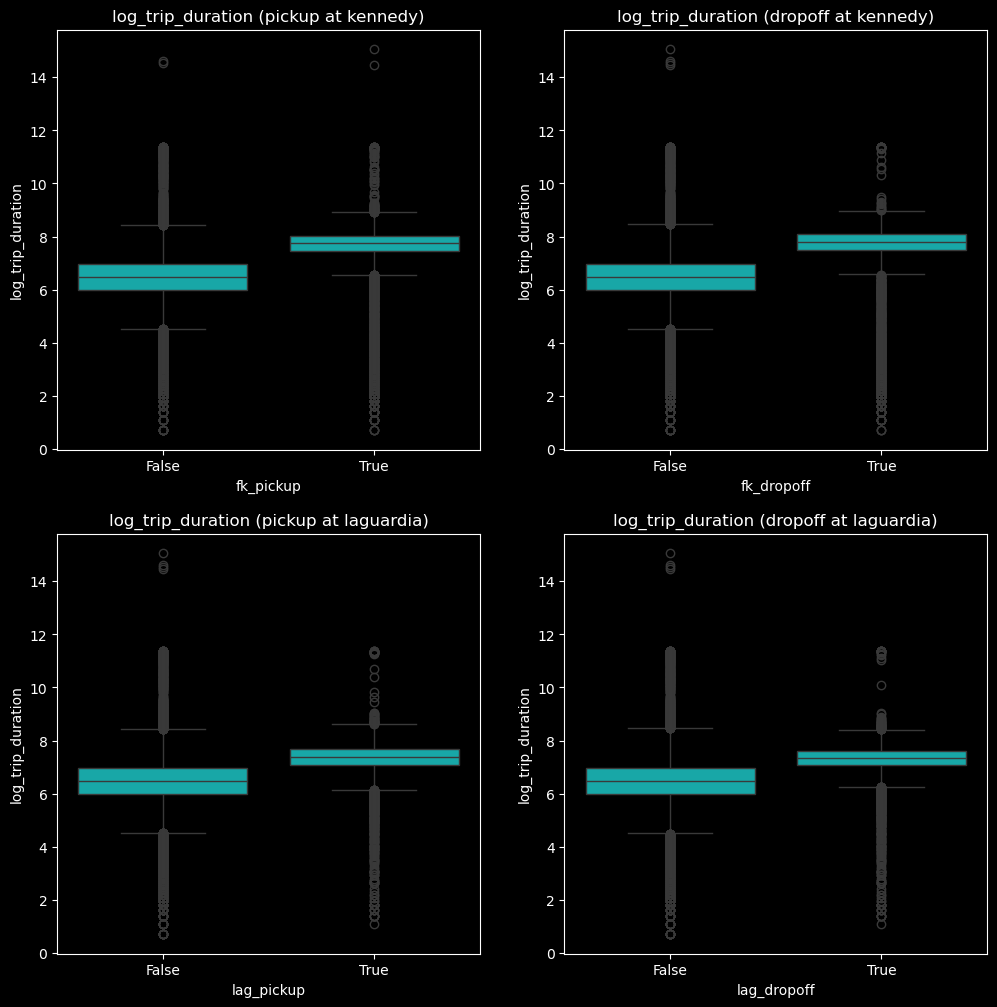

In [35]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x='fk_pickup', y='log_trip_duration', data=train_df, color='c')
plt.title('log_trip_duration (pickup at kennedy)')

plt.subplot(2, 2, 2)
sns.boxplot(x='fk_dropoff', y='log_trip_duration', data=train_df, color='c')
plt.title('log_trip_duration (dropoff at kennedy)')

plt.subplot(2, 2, 3)
sns.boxplot(x='lag_pickup', y='log_trip_duration', data=train_df, color='c')
plt.title('log_trip_duration (pickup at laguardia)')

plt.subplot(2, 2, 4)
sns.boxplot(x='lag_dropoff', y='log_trip_duration', data=train_df, color='c')
plt.title('log_trip_duration (dropoff at laguardia)')

plt.show()


**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

*В этиъ признаках достаточно много выбросов, что не очень хорошо для модели и ее качества. Однако видно, что медианы и верхний и нижний квартиль заметно различаются для значений True False в каждом из признаков, то есть они действительно объясняют различия в средней продолжительности (логарифме) - поездки из/в аэропорты более длинные*

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):

  def __init__(self, lower_left=(40.7082, -74.0171), upper_right=(40.7956, -73.9395), rows=4, cols=3):
    self.rows = rows
    self.cols = cols
    self.lower_left = lower_left
    self.upper_right = upper_right
    self.lat_grid = None
    self.long_grid = None
  
  def show_map(self):
    center = ((self.lower_left[0] + self.upper_right[0]) / 2, (self.lower_left[1] + self.upper_right[1]) / 2)
    map_image = folium.Map(location=center, zoom_start=12)

    for lat in self.lat_grid:
        segment = [(lat, self.long_grid[0]), (lat, self.long_grid[-1])]
        folium.PolyLine(segment, color="red", weight=2).add_to(map_image)
        
    for long in self.long_grid:
        segment = [(self.lat_grid[0], long), (self.lat_grid[-1], long)]
        folium.PolyLine(segment, color="red", weight=2).add_to(map_image)

    return map_image

  def fit(self, X, y=None):
    lat_span = self.upper_right[0] - self.lower_left[0]
    long_span = self.upper_right[1] - self.lower_left[1]
    self.lat_grid = [self.lower_left[0] + lat_span * (i / self.rows) for i in range(self.rows + 1)]
    self.long_grid = [self.lower_left[1] + long_span * (i / self.cols) for i in range(self.cols + 1)]
    return self

  def get_cell_num(self, row, is_pickup):
    lat, long = (row['pickup_latitude'], row['pickup_longitude']) if is_pickup else (row['dropoff_latitude'], row['dropoff_longitude'])
    try:
      lat_ind = next(i for i, coord in enumerate(self.lat_grid) if coord >= lat)
    except StopIteration:
      return -1
    #lat_ind = next((i for i, coord in enumerate(self.lat_grid) if coord >= lat), 0)
    #long_ind = next((i for i, coord in enumerate(self.long_grid) if coord >= long), 0)
    try:
      long_ind = next(i for i, coord in enumerate(self.long_grid) if coord >= long)
    except StopIteration:
      return -1
    if (lat_ind in [0, len(self.lat_grid) - 1]) or (long_ind in [0, len(self.long_grid) - 1]):
      return -1
    return (lat_ind - 1) * self.cols + long_ind - 1

  def transform(self, X, y=None):
    res = X.copy()
    res['pickup_cell_num'] = res.loc[:, ['pickup_latitude', 'pickup_longitude']].apply(lambda row: self.get_cell_num(row, is_pickup=True), axis=1)
    res['dropoff_cell_num'] = res.loc[:, ['dropoff_latitude', 'dropoff_longitude']].apply(lambda row: self.get_cell_num(row, is_pickup=False), axis=1)
    return res.loc[:, ['pickup_cell_num', 'dropoff_cell_num']]

In [37]:
map_grid_transformer = MapGridTransformer()
map_grid_transformer.fit(X=train_df)
train_df_new = map_grid_transformer.transform(X=train_df)
map_grid_transformer.show_map()

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [38]:
#train_df_new.pickup_cell_num.unique()
train_df['pickup_cell_num'] = train_df_new['pickup_cell_num']
train_df['dropoff_cell_num'] = train_df_new['dropoff_cell_num']

In [39]:
train, test = train_test_split(train_df, test_size=0.3, random_state=42) 
features = ['month', 'hour', 'weekday', 'snow', 'may', 'day', 'traffic', 'free', 'fk_pickup', 'fk_dropoff', 'lag_pickup', 'lag_dropoff', 
'log_haversine', 'pickup_cell_num', 'dropoff_cell_num', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

X_train = train[features]
X_test = test[features]
y_train = train.log_trip_duration
y_test = test.log_trip_duration

transformer = ColumnTransformer(
  [
    ('cat', OneHotEncoder(), ['weekday', 'month', 'snow', 'may', 'hour', 'traffic', 'free', 'fk_pickup', 'fk_dropoff', 'lag_pickup', 'lag_dropoff', 
    'dropoff_cell_num', 'pickup_cell_num']),
    ('num', StandardScaler(), ['day', 'log_haversine', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
  ]
)
pipeline = Pipeline(steps=[
  ('ohe_and_scale', transformer),
  ('ridge', Ridge())
])

y_train_ = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)
print(f'test:{rmsle(y_test, y_pred)}')
print(f'train:{rmsle(y_train, y_pred_train)}')

test:0.476020757931785
train:0.4763080870842472


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

*Признак провайдера может влиять, если разные провайдеры (а их всего два) покрывают например разные территории города. Количество пассажиров как будто влияет, только если их больше 4, например, те это групповая поездка, которая может совершаться на большое расстояние. `store_and_fwd_flag` возмоэно может влиять на точность данных, так как они могли быть переданы с задержкой. Или у разных провайдеров может быть разная стратегия передачи данных*

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [40]:
print(f'Vendor_id unique values: {len(train_df.vendor_id.unique())}')
print(f'Passenger_count unique values: {len(train_df.passenger_count.unique())}')
print(f'Store_and_fwd_flag unique values: {len(train_df.store_and_fwd_flag.unique())}')

Vendor_id unique values: 2
Passenger_count unique values: 10
Store_and_fwd_flag unique values: 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

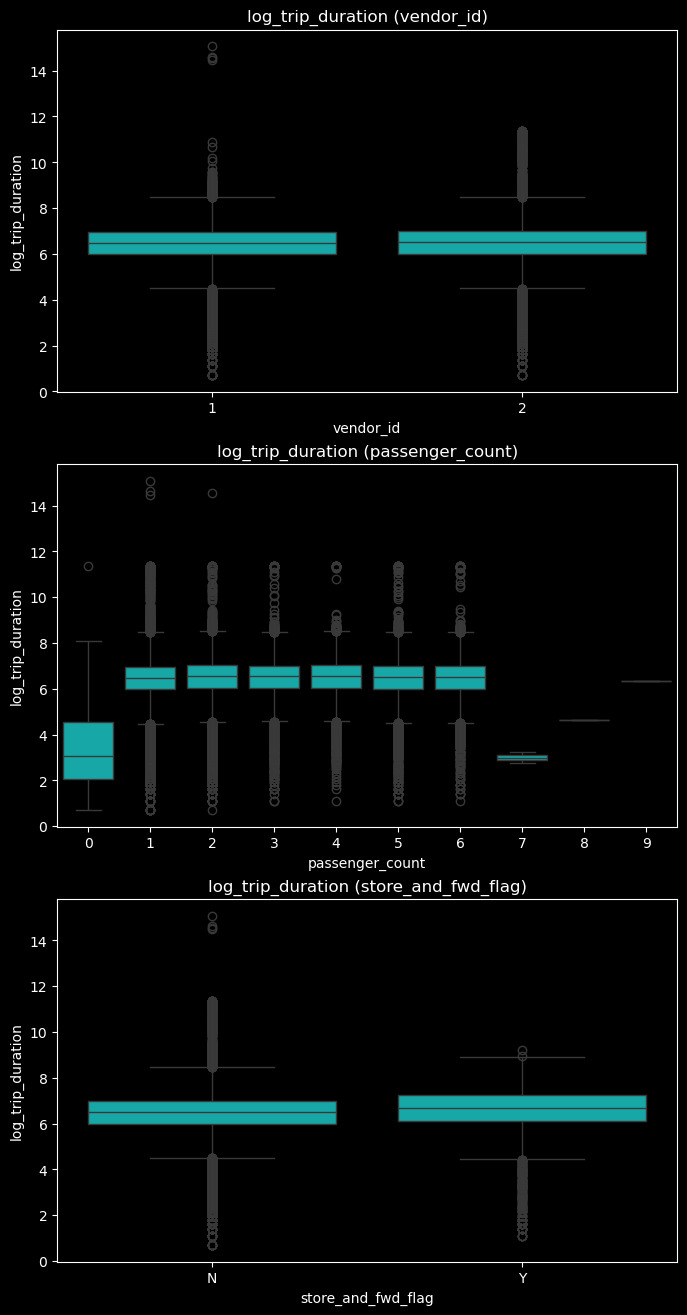

In [41]:
plt.figure(figsize=(8, 16))

plt.subplot(3, 1, 1)
sns.boxplot(x='vendor_id', y='log_trip_duration', data=train_df, color='c')
plt.title('log_trip_duration (vendor_id)')

plt.subplot(3, 1, 2)
sns.boxplot(x='passenger_count', y='log_trip_duration', data=train_df, color='c')
plt.title('log_trip_duration (passenger_count)')

plt.subplot(3, 1, 3)
sns.boxplot(x='store_and_fwd_flag', y='log_trip_duration', data=train_df, color='c')
plt.title('log_trip_duration (store_and_fwd_flag)')

plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [42]:
train_df['store_and_fwd_flag'] = (train_df['store_and_fwd_flag'] == 'Y').astype(int) 
train_df['vendor_id'] = (train_df['vendor_id'] == 2).astype(int) 

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

*Похоже, что признаки vendor_id и store_and_fwd_flag особо не влияют на таргет. Количество пассажиров, кроме значений 0 и 7 - тоже (если 0 ставился в случае отсутствия данных о количетсве, то он не имеет значимости)*

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [43]:
train, test = train_test_split(train_df, test_size=0.3, random_state=42) 
features = ['month', 'hour', 'weekday', 'snow', 'may', 'day', 'traffic', 'free', 'fk_pickup', 'fk_dropoff', 'lag_pickup', 'lag_dropoff', 
'log_haversine', 'vendor_id', 'store_and_fwd_flag', 'passenger_count', 'pickup_cell_num', 'dropoff_cell_num', 'pickup_longitude', 
'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

X_train = train[features]
X_test = test[features]
y_train = train.log_trip_duration
y_test = test.log_trip_duration

transformer = ColumnTransformer(
  [
    ('cat', OneHotEncoder(), ['weekday', 'month', 'snow', 'may', 'hour', 'traffic', 'free', 'fk_pickup', 'fk_dropoff', 'lag_pickup', 'lag_dropoff',
    'vendor_id', 'store_and_fwd_flag', 'passenger_count', 'pickup_cell_num', 'dropoff_cell_num']),
    ('num', StandardScaler(), ['day', 'log_haversine', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
  ]
)
pipeline = Pipeline(steps=[
  ('ohe_and_scale', transformer),
  ('ridge', Ridge())
])

y_train_ = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)
print(f'test:{rmsle(y_test, y_pred)}')
print(f'train:{rmsle(y_train, y_pred_train)}')

test:0.4755654613640888
train:0.47585200309140907


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [44]:
#train.drop(columns=['vendor_id', 'store_and_fwd_flag'])
#test.drop(columns=['vendor_id', 'store_and_fwd_flag'])

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

Text(0.5, 1.0, 'residuals')

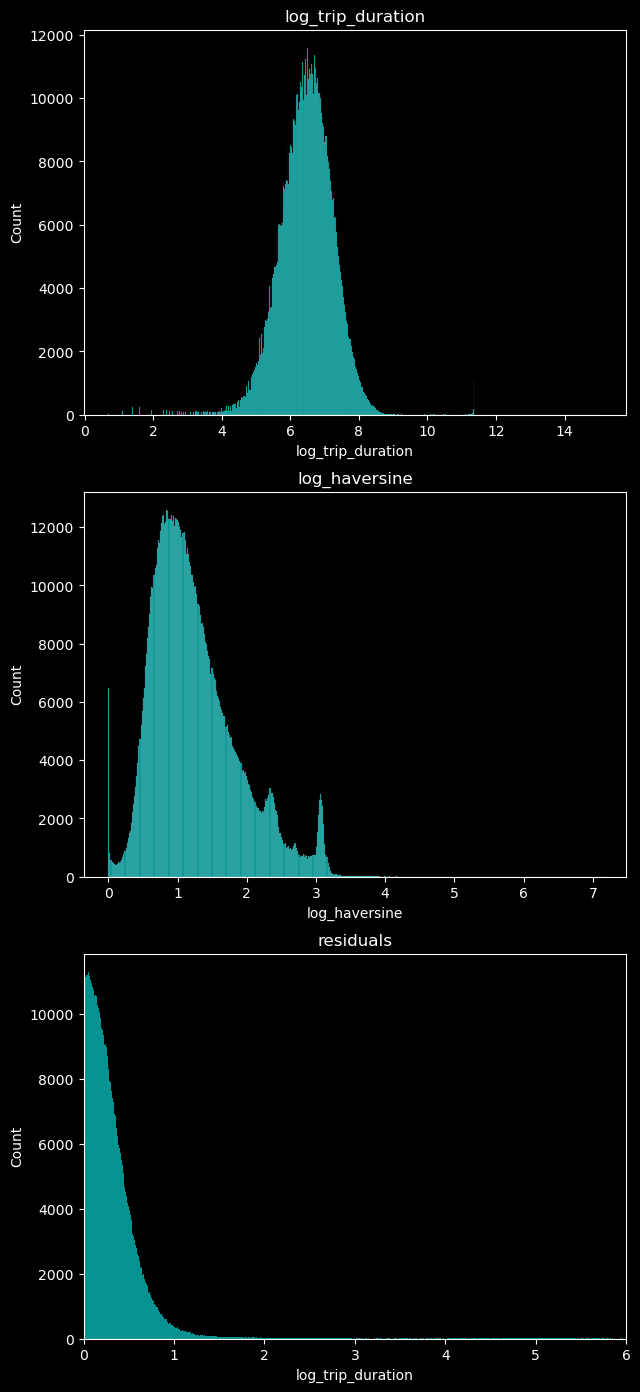

In [45]:
plt.figure(figsize=(7, 17))

plt.subplot(3, 1, 1)
sns.histplot(train['log_trip_duration'], color='c')
plt.title('log_trip_duration')

plt.subplot(3, 1, 2)
sns.histplot(train['log_haversine'], color='c') 
plt.title('log_haversine')

plt.subplot(3, 1, 3)
sns.histplot(train['log_trip_duration'] - y_pred_train, color='c')
plt.xlim(0, 6)
plt.title('residuals')

Text(0.5, 1.0, 'residuals')

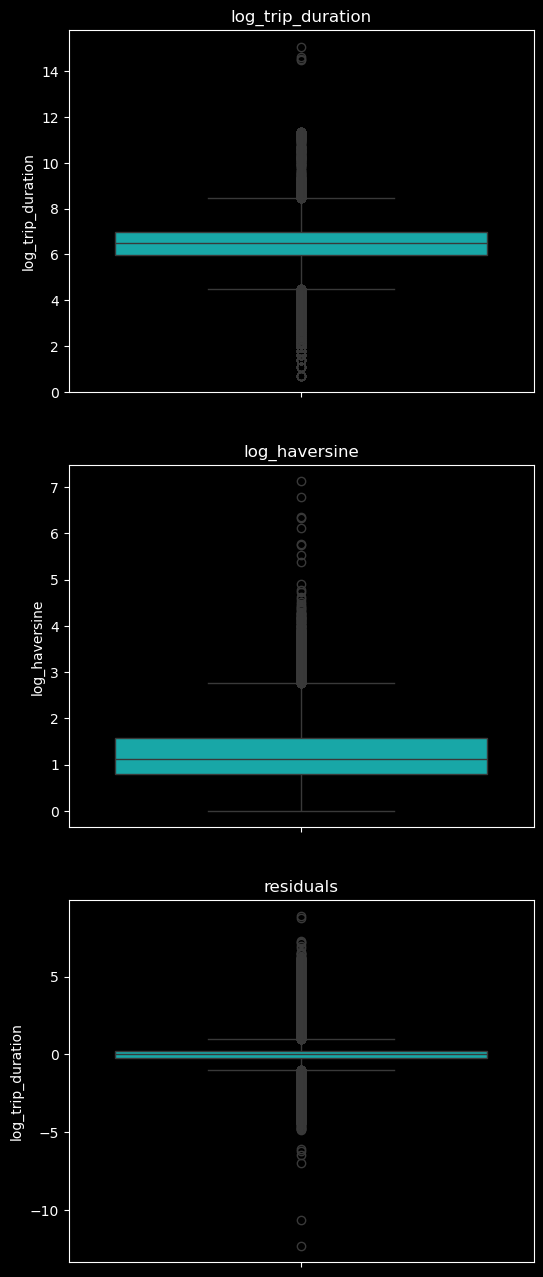

In [46]:
plt.figure(figsize=(6, 16))

plt.subplot(3, 1, 1)
sns.boxplot(train['log_trip_duration'], color='c')
plt.title('log_trip_duration')

plt.subplot(3, 1, 2)
sns.boxplot(train['log_haversine'], color='c')
plt.title('log_haversine')

plt.subplot(3, 1, 3)
sns.boxplot(train['log_trip_duration'] - y_pred_train, color='c')
plt.title('residuals')

In [47]:
train['y_pred'] = y_pred_train
print(train.shape)
train = train.loc[train['log_trip_duration'] > 4]
train = train.loc[train['log_haversine'] <= 3]
train = train.loc[abs(train['log_trip_duration'] - train['y_pred']) < 2]
train.drop(columns=['y_pred'], inplace=True)
train.shape

(1021050, 27)


(991387, 26)

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [48]:
print(train_df.passenger_count.value_counts())
print(train_df.weekday.value_counts())
print(train_df.day.value_counts())
print(train_df.month.value_counts())
print(train_df.lag_pickup.value_counts())
print(train_df.lag_dropoff.value_counts())
print(train_df.fk_pickup.value_counts())
print(train_df.fk_dropoff.value_counts())
print(train_df.vendor_id.value_counts())
print(train_df.store_and_fwd_flag.value_counts())

passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64
weekday
5    223533
6    220868
4    218574
3    210136
2    202749
7    195366
1    187418
Name: count, dtype: int64
day
100    9796
107    9602
65     9597
93     9325
44     9309
       ... 
3      6353
25     6084
151    5570
24     3383
23     1648
Name: count, Length: 182, dtype: int64
month
March       256189
April       251645
May         248487
February    238300
June        234316
January     229707
Name: count, dtype: int64
lag_pickup
False    1438443
True       20201
Name: count, dtype: int64
lag_dropoff
False    1447954
True       10690
Name: count, dtype: int64
fk_pickup
False    1433452
True       25192
Name: count, dtype: int64
fk_dropoff
False    1449429
True        9215
Name: count, dtype: int64
vendor_id
1    780302
0    678342
Name: count, dtype: int64
store_and_fwd_flag
0    1450599
1       8045


In [49]:
#похоже, что от 7, 8 и 9 вообще можно избавиться, а 0 заменить например на самое частое - 1

train = train.loc[train['passenger_count'] < 7]
test = test.loc[test['passenger_count'] < 7]
train.loc[train['passenger_count'].isin([0]), 'passenger_count'] = 1
test.loc[test['passenger_count'].isin([0]), 'passenger_count'] = 1

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [50]:
transformer = ColumnTransformer(
  [
    ('cat', OneHotEncoder(handle_unknown="ignore"), ['weekday', 'month', 'snow', 'may', 'hour', 'traffic', 'free', 'fk_pickup', 'fk_dropoff', 'lag_pickup', 'lag_dropoff',
     'passenger_count', 'pickup_cell_num', 'dropoff_cell_num']),
    ('num', StandardScaler(), ['day', 'log_haversine', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
  ]
)
pipeline = Pipeline(steps=[
  ('ohe_and_scale', transformer),
  ('ridge', Ridge())
])

X_train = train[['month', 'hour', 'weekday', 'snow', 'may', 'day', 'traffic', 'free', 'fk_pickup', 'fk_dropoff', 'lag_pickup', 'lag_dropoff', 
'log_haversine','passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','pickup_cell_num', 'dropoff_cell_num']]
y_train = train.log_trip_duration

X_test = test[['month', 'hour', 'weekday', 'snow', 'may', 'day', 'traffic', 'free', 'fk_pickup', 'fk_dropoff', 'lag_pickup', 'lag_dropoff', 
'log_haversine','pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'pickup_cell_num', 'dropoff_cell_num']]
y_test = test.log_trip_duration


model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(f'test:{rmsle(y_test, y_pred)}')
print(f'train:{rmsle(y_train, y_pred_train)}')

test:0.4777320109948274
train:0.39879245154472764


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [51]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", transformer.transform(X_train).shape)

Size before OneHot: (991385, 20)
Size after OneHot: (991385, 79)


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [52]:
from sklearn.linear_model import Lasso

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), ['weekday', 'month', 'snow', 'may', 'hour', 'traffic', 'free', 'fk_pickup', 'fk_dropoff', 'lag_pickup', 'lag_dropoff',
     'passenger_count', 'pickup_cell_num', 'dropoff_cell_num']),
    ('scaling', StandardScaler(), ['day', 'log_haversine', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

X_train = train[['month', 'hour', 'weekday', 'snow', 'may', 'day', 'traffic', 'free', 'fk_pickup', 'fk_dropoff', 'lag_pickup', 'lag_dropoff', 
'log_haversine','passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_cell_num', 'dropoff_cell_num']]
X_test = test[['month', 'hour', 'weekday', 'snow', 'may', 'day', 'traffic', 'free', 'fk_pickup', 'fk_dropoff', 'lag_pickup', 'lag_dropoff', 
'log_haversine','passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_cell_num', 'dropoff_cell_num']]

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(f'test:{rmsle(y_test, y_pred)}')
print(f'train:{rmsle(y_train, y_pred_train)}')

test:0.7952579214239665
train:0.7048201659164886


Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [55]:
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

alphas = np.logspace(-4, 2, 20) 
lasso_param_grid = [{'regression__alpha': alphas}]
lasso_searcher = GridSearchCV(lasso_pipeline, lasso_param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_searcher.fit(X_val, y_val)

ridge_param_grid = [{'ridge__alpha': alphas}]
ridge_searcher = GridSearchCV(pipeline, ridge_param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_searcher.fit(X_val, y_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ohe_and_scale',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['weekday',
                                                                          'month',
                                                                          'snow',
                                                                          'may',
                                                                          'hour',
                                                                          'traffic',
                                                                          'free',
                                                                          'fk_pickup',
                                                                          'fk_dropoff',
                                                                          'lag_pickup',
                                                                          'lag_dropoff',
                                                                          'passenger_count',
                                                                          'pickup_cell_num',
                                                                          'dropoff_cell_num']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['day',
                                                                          'log_haversine',
                                                                          'pickup_longitude',
                                                                          'pi...
             param_grid=[{'ridge__alpha': array([1.00000000e-04, 2.06913808e-04, 4.28133240e-04, 8.85866790e-04,
       1.83298071e-03, 3.79269019e-03, 7.84759970e-03, 1.62377674e-02,
       3.35981829e-02, 6.95192796e-02, 1.43844989e-01, 2.97635144e-01,
       6.15848211e-01, 1.27427499e+00, 2.63665090e+00, 5.45559478e+00,
       1.12883789e+01, 2.33572147e+01, 4.83293024e+01, 1.00000000e+02])}],
             scoring='neg_mean_squared_error')

In [72]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), ['weekday', 'month', 'snow', 'may', 'hour', 'traffic', 'free', 'fk_pickup', 'fk_dropoff', 'lag_pickup', 'lag_dropoff',
     'passenger_count', 'pickup_cell_num', 'dropoff_cell_num']),
    ('scaling', StandardScaler(), ['day', 'log_haversine', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

transformer = ColumnTransformer(
  [
    ('cat', OneHotEncoder(handle_unknown="ignore"), ['weekday', 'month', 'snow', 'may', 'hour', 'traffic', 'free', 'fk_pickup', 'fk_dropoff', 'lag_pickup', 'lag_dropoff',
     'passenger_count', 'pickup_cell_num', 'dropoff_cell_num']),
    ('num', StandardScaler(), ['day', 'log_haversine', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
  ]
)
pipeline = Pipeline(steps=[
  ('ohe_and_scale', transformer),
  ('ridge', Ridge())
])


In [73]:
best_lasso = lasso_searcher.best_params_['regression__alpha']
print("Best alpha for lasso = %.4f" % best_lasso)
lasso_pipeline.set_params(**{'regression__alpha' : best_lasso})
model_lasso = lasso_pipeline.fit(X_train_new, y_train_new)
print('Best score:', rmsle(y_test, model_lasso.predict(X_test)))

best_ridge = ridge_searcher.best_params_['ridge__alpha']
print("Best alpha for ridge = %.4f" % best_ridge)
pipeline.set_params(**{'ridge__alpha' : best_ridge})
model_ridge = pipeline.fit(X_train_new, y_train_new)
print('Best score:', rmsle(y_test, model_ridge.predict(X_test)))

Best alpha for lasso = 0.0001
Best score: 0.4786250835160823
Best alpha for ridge = 0.0336
Best score: 0.47775208929329077


Сохраните наилучшее значение, как бенчмарк на будущее

In [74]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
best_rmsle = 0.477752

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

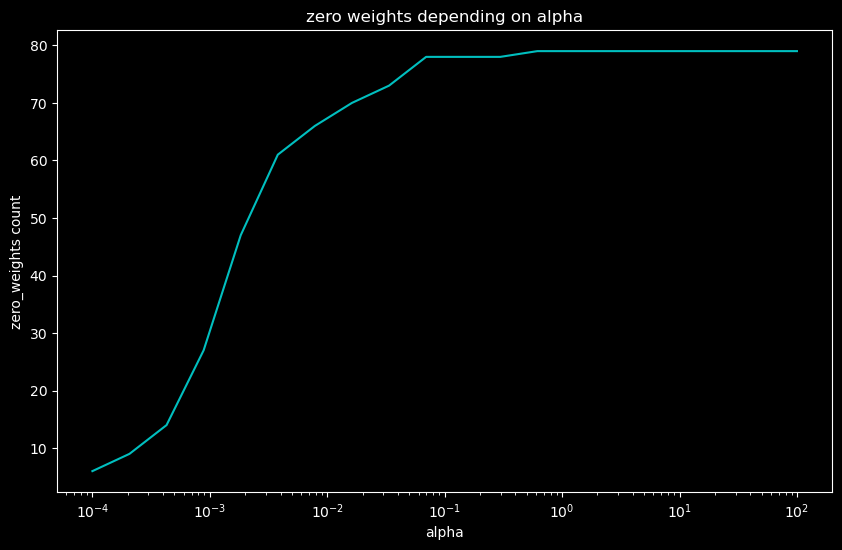

In [58]:
zero_weights = []
alphas = np.logspace(-4, 2, 20)

for alpha in alphas:
  lasso_search_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(alpha=alpha))
  ])
  model = lasso_search_pipeline.fit(X_val, y_val)
  zero_weights.append((79 - np.count_nonzero(model.named_steps['regression'].coef_)))
  #print(model.named_steps['regression'].coef_)
 
plt.figure(figsize=(10, 6))
plt.plot(alphas, zero_weights, color='c')
plt.xscale('log')
plt.title('zero weights depending on alpha')
plt.xlabel('alpha')
plt.ylabel('zero_weights count')
plt.show()

In [59]:
n = 79
half_zero = n // 2
alpha_threshold = alphas[np.array(zero_weights) >= half_zero][0]
lasso_s_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(alpha=alpha_threshold))
  ])
lasso_s_pipeline.fit(X_train_new, y_train_new)
lasso_predictions_threshold = lasso_s_pipeline.predict(X_test)

print(f'alpha при 50% признаков = 0: {alpha_threshold}')
print("Test RMSE = %.4f" % lasso_s_pipeline.score(X_test, y_test))


alpha при 50% признаков = 0: 0.0018329807108324356
Test RMSE = 0.6240


<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

*Линейная модель выстраивает линейную зависимость между признаками, но не может учитывать их нелинейное взаимодействие друг с другом (в данном случае совпадающие пары и их влияние на продолжительность поездки)*

In [240]:
train_df['route_pair'] = train_df['pickup_cell_num'].astype(str) + '_' + train_df['dropoff_cell_num'].astype(str)
top_routes = train_df['route_pair'].value_counts().nlargest(100).index
train_df['popular_route'] = train_df['route_pair'].apply(lambda x: True if x in top_routes else False)
train_df.drop('route_pair', axis=1, inplace=True)

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [66]:
features = ['month', 'hour', 'weekday', 'snow', 'may', 'day', 'traffic', 'free', 'fk_pickup', 'fk_dropoff', 'lag_pickup', 'lag_dropoff', 
'log_haversine','passenger_count', 'pickup_cell_num', 'dropoff_cell_num', 'pickup_longitude', 
'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'popular_route']

X_train, X_test, y_train, y_test = train_test_split(train_df[features], train_df.log_trip_duration, test_size=0.3, random_state=42) 

transformer = ColumnTransformer(
  [
    ('cat', OneHotEncoder(), ['weekday', 'month', 'snow', 'may', 'hour', 'traffic', 'free', 'fk_pickup', 'fk_dropoff', 'lag_pickup', 'lag_dropoff',
    'passenger_count', 'pickup_cell_num', 'dropoff_cell_num', 'popular_route']),
    ('num', StandardScaler(), ['day', 'log_haversine', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
  ]
)
pipeline = Pipeline(steps=[
  ('ohe_and_scale', transformer),
  ('ridge', Ridge(alpha= 0.0336))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(f'test:{rmsle(y_test, y_pred)}')
print(f'train:{rmsle(y_train, y_pred_train)}')

test:0.47564357030828736
train:0.4759538689501347


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

Манхэттенское расстояние - расстояние между двумя точками в прямоугольной координатной системе.
Оно так называется, потому что в Манхэттене улицы расположены параллельно друг другу, что образует прямоугольную сетку. Путь от одной точки до другой определяется движением без диагональных переходов.

Для модели оно полезно, так как более точно показывает расстояние (Haversine - это расстояние по окружности, не учитывает особенности Манхэттена)


Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [175]:
print(best_rmsle)

0.477752


Вообще, в задании 15 получили получше - 0.47564357030828736

In [177]:
import h3

In [191]:
def h3_encode(df, resolution):
  df['pickup_h3'] = df.apply(lambda row: h3.latlng_to_cell(row['pickup_latitude'], row['pickup_longitude'], resolution), axis=1)
  df['dropoff_h3'] = df.apply(lambda row: h3.latlng_to_cell(row['dropoff_latitude'], row['dropoff_longitude'], resolution), axis=1)
  return df

resolution = 9

X_train = h3_encode(X_train, resolution)
X_test = h3_encode(X_test, resolution)

In [192]:


transformer = ColumnTransformer(
  [
    ('cat', OneHotEncoder(handle_unknown="ignore"), ['weekday', 'month', 'snow', 'may', 'hour', 'traffic', 'free', 'fk_pickup', 'fk_dropoff', 'lag_pickup', 'lag_dropoff',
    'passenger_count', 'pickup_cell_num', 'dropoff_cell_num', 'popular_route', 'pickup_h3', 'dropoff_h3']),
    ('num', StandardScaler(), ['day', 'log_haversine', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
  ]
)
pipeline = Pipeline(steps=[
  ('ohe_and_scale', transformer),
  ('ridge', Ridge(alpha= 0.0336))
])

X_train, X_test, y_train, y_test = train_test_split(train_df[features], train_df.log_trip_duration, test_size=0.3, random_state=42) 

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(f'test:{rmsle(y_test, y_pred)}')
print(f'train:{rmsle(y_train, y_pred_train)}')

test:0.46010395119823194
train:0.45318966152810625


**test rmsle: 0.46010395119823194**

In [250]:
train_df['day_of_month'] = train_df['pickup_datetime'].dt.day

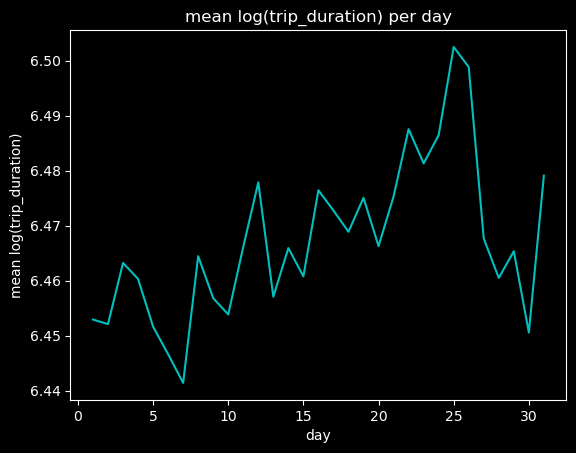

In [249]:
day = train_df.groupby('day_of_month')['log_trip_duration'].mean()
sns.lineplot(x = day.index, y = day.values, color='c')
plt.xlabel('day')
plt.ylabel('mean log(trip_duration)')
plt.title('mean log(trip_duration) per day')
plt.show()

In [251]:
transformer = ColumnTransformer(
  [
    ('cat', OneHotEncoder(handle_unknown="ignore"), ['weekday', 'month', 'snow', 'may', 'hour', 'traffic', 'free', 'fk_pickup', 'fk_dropoff', 'lag_pickup', 'lag_dropoff',
    'passenger_count', 'pickup_cell_num', 'dropoff_cell_num', 'popular_route', 'pickup_h3', 'dropoff_h3', 'day_of_month']),
    ('num', StandardScaler(), ['day', 'log_haversine', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
  ]
)

features = ['month', 'hour', 'weekday', 'snow', 'may', 'day', 'traffic', 'free', 'fk_pickup', 'fk_dropoff', 'lag_pickup', 'lag_dropoff', 
'log_haversine','passenger_count', 'pickup_cell_num', 'dropoff_cell_num', 'pickup_longitude', 
'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'popular_route', 'pickup_h3', 'dropoff_h3', 'day_of_month']

pipeline = Pipeline(steps=[
  ('ohe_and_scale', transformer),
  ('ridge', Ridge(alpha= 0.0336))
])

train_df = h3_encode(train_df, resolution)
X_train, X_test, y_train, y_test = train_test_split(train_df[features], train_df.log_trip_duration, test_size=0.3, random_state=42)


model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(f'test:{rmsle(y_test, y_pred)}')
print(f'train:{rmsle(y_train, y_pred_train)}')

test:0.4600413241997408
train:0.4530996734873973


**test rmsle: 0.4600413241997408**

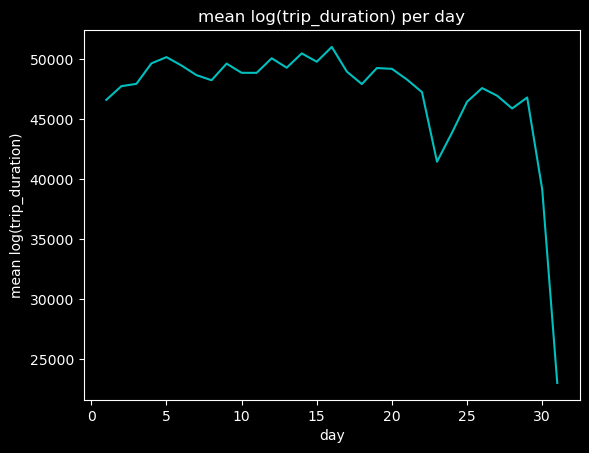

In [252]:
day = train_df.groupby('day_of_month')['id'].count()
sns.lineplot(x = day.index, y = day.values, color='c')
plt.xlabel('day')
plt.ylabel('mean log(trip_duration)')
plt.title('log(trip_duration) per day')
plt.show()

In [262]:
#day.head(31)

In [266]:
train_df['end_month'] = np.where(train_df.loc[:, 'day_of_month']>= 25, True, False)

In [267]:
transformer = ColumnTransformer(
  [
    ('cat', OneHotEncoder(handle_unknown="ignore"), ['weekday', 'month', 'snow', 'may', 'hour', 'traffic', 'free', 'fk_pickup', 'fk_dropoff', 'lag_pickup', 'lag_dropoff',
    'passenger_count', 'pickup_cell_num', 'dropoff_cell_num', 'popular_route', 'pickup_h3', 'dropoff_h3', 'day_of_month', 'end_month']),
    ('num', StandardScaler(), ['day', 'log_haversine', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
  ]
)

features = ['month', 'hour', 'weekday', 'snow', 'may', 'day', 'traffic', 'free', 'fk_pickup', 'fk_dropoff', 'lag_pickup', 'lag_dropoff', 
'log_haversine','passenger_count', 'pickup_cell_num', 'dropoff_cell_num', 'pickup_longitude', 
'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'popular_route', 'pickup_h3', 'dropoff_h3', 'day_of_month', 'end_month']

pipeline = Pipeline(steps=[
  ('ohe_and_scale', transformer),
  ('ridge', Ridge(alpha= 0.0336))
])

X_train, X_test, y_train, y_test = train_test_split(train_df[features], train_df.log_trip_duration, test_size=0.3, random_state=42)


model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(f'test:{rmsle(y_test, y_pred)}')
print(f'train:{rmsle(y_train, y_pred_train)}')

test:0.46003757243414933
train:0.4531022543550157


In [270]:
train_df['manhattan_distance'] = abs(train_df.pickup_longitude - train_df.dropoff_longitude) + abs(train_df.pickup_latitude - train_df.dropoff_latitude)

In [271]:
train_df['log_manhattan_dist'] = np.log1p(train_df['manhattan_distance'])

In [273]:
transformer = ColumnTransformer(
  [
    ('cat', OneHotEncoder(handle_unknown="ignore"), ['weekday', 'month', 'snow', 'may', 'hour', 'traffic', 'free', 'fk_pickup', 'fk_dropoff', 'lag_pickup', 'lag_dropoff',
    'passenger_count', 'pickup_cell_num', 'dropoff_cell_num', 'popular_route', 'pickup_h3', 'dropoff_h3', 'day_of_month', 'end_month']),
    ('num', StandardScaler(), ['day', 'log_haversine', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'log_manhattan_dist'])
  ]
)

features = ['month', 'hour', 'weekday', 'snow', 'may', 'day', 'traffic', 'free', 'fk_pickup', 'fk_dropoff', 'lag_pickup', 'lag_dropoff', 
'log_haversine','passenger_count', 'pickup_cell_num', 'dropoff_cell_num', 'pickup_longitude', 
'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'popular_route', 'pickup_h3', 'dropoff_h3', 'day_of_month', 'end_month', 'log_manhattan_dist']

pipeline = Pipeline(steps=[
  ('ohe_and_scale', transformer),
  ('ridge', Ridge(alpha= 0.0336))
])

X_train, X_test, y_train, y_test = train_test_split(train_df[features], train_df.log_trip_duration, test_size=0.3, random_state=42)


model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(f'test:{rmsle(y_test, y_pred)}')
print(f'train:{rmsle(y_train, y_pred_train)}')

test:0.4557191635667906
train:0.4495936286732219


**test rmsle: 0.4557191635667906**

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.